# INF2 TP4

# Chazelas Clément, Mantion Nathan

# Exercice 1

Entrer la valeur pour NCIN du candidat  >  sz
Entrer la valeur pour NOM du candidat  >  oui
Entrer la valeur pour PRENOM du candidat  >  lama
Entrer la valeur pour AGE du candidat  >  18
Entrer la valeur pour DECISION du candidat  >  admis

Candidat suivant, appuyez sur entrée pour terminer la saise.

Entrer la valeur pour NCIN du candidat  >  

Fin de la saisie

Pourcentage des candidats refusés = 0.0%


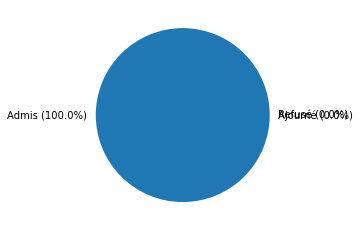

Pourcentage des candidats admis = 100.0%


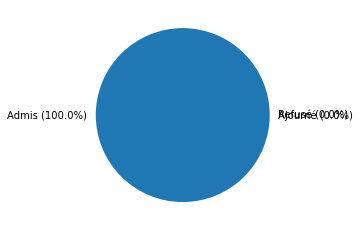

Pourcentage des candidats ajournés = 0.0%


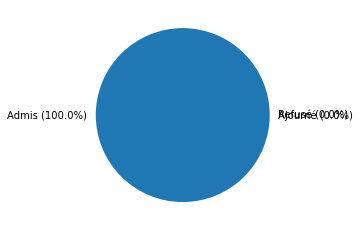

In [2]:
import matplotlib.pyplot as plt
def saisir(): #défintion de la fonction
    stillon=True #Variable vérifiant si la saisie continue toujours
    args=["NCIN","NOM","PRENOM","AGE","DECISION"] #Liste des arguments données pour l'utilisateur
    f=open("concours.txt","w+") #ouverture du fichier pour écriture
    while stillon: #Début de la boucle
        candidat="" #Variable de la saisie du candidat
        valid=True #Varianle vérifiant la validité de la saise utilisateur
        for arg in args: #Boucle permettant une entrée par caractérisitique du candidat
            entree = input(f"Entrer la valeur pour {arg} du candidat  >  ") #entrée utilisateur
       
            if entree == "" and arg == "NCIN": #Condition de fin de saisie, si la saisie est vide, la boucle s'arrête
                stillon = False #indication de la fin de la saisie
                valid=False #Indication que la variable "candidat" a venir n'est pas une saisie a entrer dans le fichier
                break #sortie de la boucle de saise d'un utilisateur
            if entree =="": #vérification de la non-nullité de la variable entrée
                print("Entrée vide.\nMerci de recommencer la saisie du candidat\n") #Notification d'une erreur à l'utilisateur, pour éviter tout problèmes on recommencera la saisie candidat depuis le début
                valid=False #Indiaction que l'entrée n'est pas valide
                break #Sortie de la boucle pour en revenir au début
            if arg == "AGE": #Vérification de la validité des données pour l'age
                try:
                    int(entree) #Si l'age est bien un nombre, la saisie est valide
                except ValueError: #si ce n'est pas un nombre, l'utilsateur en est notifié et la saisie du candidat recommence depuis le début
                    print("Entrée non valide, l'age doit être un entier\nMerci de recommencer la saisie du candidat\n")
                    valid=False
                    break
            if arg == "DECISION": #Vérifiaction de la validité des données pour la décision
                pos = ["admis","refusé","ajourné"]
                if not entree in pos: # Si la décision entrée n'est pas valide, l'utilsateur en est notifié et la saisie du candidat recommence depuis le début
                    print("Entrée non valide, la décision ne peut avoir que trois valeurs 'admis' 'refusé' et 'ajourné'.\nMerci de recommencer la saisie du candidat\n")
                    valid=False
                    break
            candidat += entree +";" #Ajout du point virgule de sépratation
        if valid: #Si la saise est valide, on l'inscrit dans le fichier
            f.write(candidat+"\n") #L'ajout du "\n" permet de sauter une ligne
            print("\nCandidat suivant, appuyez sur entrée pour terminer la saise.\n") #Notification a l'utilisateur que l'on passe a la saisie suivante
    print("\nFin de la saisie\n") #Lorsque la saisie est finir, on en notifie l'utilisateur
    f.close() #Fermeture de l'instance du fichier
 
def admis(): #défintion de la fonction
    concours = open("concours.txt","r") #Ouverture du fichier avec les résultats du concours
    admis = open("admis.txt","w+") # ouverture du fichier des admis
    for entree in concours.read().split("\n"): #On crée une liste a partir du contenu, puisqu'il y a un candidat par liste, on prends le saut de ligne comme séparateur
        if entree[-6:] == "admis;": #Puisque le dernier élément entré est le résultat, on vérifie si la chaine finit par une admission
            admis.write(entree+"\n") #Si le candidat est admis, on ajoute le nom au fichier
    concours.close() #fermeture des instances de fichier
    admis.close()
 
def attente(): #défintion de la fonction
    admis = open("admis.txt","r") #Ouverture du fichier des admis
    attente = open("attente.txt","w+") # Ouverture du fichier des personnes en attente
    entrees = admis.read().split("\n") #On sépare les candidats comme dans la fonction précédente
    entrees.pop() #On enlève le dernier élément de la liste qui est une liste vide due au dernier saut de ligne
    for entree in entrees:
        entree = entree.split(";") #On convertit la chaine du candidat en liste pour vérifier plus facilement la condition d'age
        if int(entree[3]) > 30: #L'age étant la 4e information entrée, elle aparait à l'index 3 de la liste du candidat, on le convertit en entier puis on vérifie s'il est supérieur a 30
            attente.write(f"{entree[0]};{entree[1]};{entree[2]}"+"\n") #Si il est supérieur a 30 on ajoute les informations du candidat dans le fichier
    admis.close() #Fermeture des instances de fichier
    attente.close()
 
def statistique(dec): #défintion de la fonction
    concours = open("concours.txt","r") #Ouverture du fichier des résultats du concours
    ajourne=0 #Définition des variable pour compter les résultats et le total
    admis=0
    refuse=0
    tot=0
    for candidat in concours.read().split("\n"): #On sépare les candidats comme dans la fonction précédente
        if candidat[-8:] == "ajourné;": # Comme dans la fonction admis() on vérifie le résultat de chaque candidat
            ajourne +=1 #En fonction du résultat, on ajoute 1 au compteur correspondant
            tot+=1 #Et 1 au compteur total
        if candidat[-6:] == "admis;":
            admis +=1
            tot+=1
        if candidat[-7:] == "refusé;":
            refuse +=1
            tot+=1
   
    if dec == "admis": #L'énoncé demandant l'affichage d'un pourcentage en fonction de l'entrée dans la fonction on vérifie la décision entrée
        print(f"Pourcentage des candidats admis = {round((admis/tot)*100,2)}%") #Puis on en cacule le pourcentage arrondi à 2 chiffres aprés la virgule qu'on affiche
    elif dec == "refusé":
        print(f"Pourcentage des candidats refusés = {round((refuse/tot)*100,2)}%")
    elif dec == "ajourné":
        print(f"Pourcentage des candidats ajournés = {round((ajourne/tot)*100,2)}%")
 
    plt.pie((admis,refuse,ajourne),labels=[f"Admis ({round((admis/tot)*100,2)}%)",f"Refusé ({round((refuse/tot)*100,2)}%)",f"Ajourné ({round((ajourne/tot)*100,2)}%)"],normalize=True) #Création du camembert, on met en légende le résultat ainsi que le pourcentage pour faciliter la lecture du graphique
    plt.show() #On montre le graphique
 
def supprimer(): #défintion de la fonction
    admis = open("admis.txt","r") #Ouverture du fichier des admis
    admission = admis.read().split("\n") #On sépare les candidats comme dans la fonction précédente
    admis.close() #Fermeture de l'instance en lecture
    admis = open("admis.txt","w+") #Pour réouvrir le fichier en écriture
    admission.pop() #On enlève la dernière ligne qui n'est qu'une ligne vide (le dernier saut de ligne donnant sur rien)
    for entree in admission: #Boucle pour vérifier chauqe candidat
        if int(entree.split(";")[3]) <= 30: #On vérifie si le candidat à moins de 30 ans
            admis.write(entree+"\n") #Si oui, on l'inscrit dans le fichier
    admis.close() #Fermeture de l'instance fichier
 
 
if __name__ == "__main__":
    saisir() #Saisie des candidats
    admis() #on crée le fichier des candidats admis
    attente() #On crée le fichier des candidats en attente
    statistique("refusé") #On montre le pourcentage des candidats refusés
    statistique("admis") #On montre le pourcentage des candidats admis
    statistique("ajourné") #On montre le pourcentage des candidats ajournés
    supprimer() #On supprime du fichier des admis les candidats en attente


Dans un premier temps,pour la fonction saisie() nous avons opté pour une boucle While True avant d’en faire le quasi équivalent avec la variable stillon qui avait sensiblement le même effet mais avec un meilleur contrôle de la boucle dans la suite du programme. La saisie continue donc tant que l’utilisateur n’entre pas une ligne vide au début de la saisie d’un candidat. On ajoute des vérification de données afin de s’assurer qu’il n’y aura pas de problèmes lors de l’exécution des autres fonctions dépendantes du fichier créé. Pour la fonction admis nous avons cherché le point commun de toutes les entrées contenant des candidats admis, nous avons trouvé qu’elles se finissent toutes par “admis;” nous l’avons donc mis en condition pour l’écrire dans le fichier admis.txt. Nous avons d’ailleurs travaillé de la même façon pour compter les candidats en fonction de leur résultat pour la fonction statistique(). Pour la fonction attente nous avons là aussi cherché à trouver comment différencier un candidat de plus 30 ans d’un autre. Nous ne pouvions utiliser la vérification sur un index précis de caractères car ils varient en fonction du nom, prénom et résultat du candidat. Puisque chaque information d’un candidat est séparée par un “;” nous avons alors choisi de créer une liste a avec la méthode split() en entrant “;” comme séparateur puis en vérifiant l’information à l'index 3 c’est à dire à l’index de l'âge (en n'oubliant pas de le convertir en entier pour utiliser les comparateurs). Nous avons fait de même pour la fonction supprimer().

# Exercice 2

### Question 1

In [ ]:
from turtle import color
import numpy as np
import matplotlib.pyplot as plt

def cercle(x ,y ,r) :
    figure, axes = plt.subplots()
    axes.set_aspect(1)
    plt.xlim(-r - 5 ,r + 5)     #On défini la taille de l'affichage
    plt.ylim(-r - 5, r + 5)
    for i in range(r) :    #On fait une boucle afin de tracer le nombre de cercles corespondant à la taille du rayon
        couleur= input("Choisissez la couleur de ce cercle parmis blue/green/red/cyan/magenta/yellow/black/maroon : \n")    #On demande à l'utilisateur de choisir la couleur du cercle parmis différentes couleurs proposées
        draw_circle = plt.Circle((x, y), r,fill=False, color=couleur)   #On crée le cercle de centre (x,y) et de rayon r de la couleur choisie précedement
        axes.add_artist(draw_circle)
        r = r - 1    #On diminue le rayon afin que le prochain cercle soit de même centre mais plus petit
    plt.title('Cercle')
    plt.show()

def main() :
    x = int(input("Entrez les abscisses du centre du cercle :  "))
    y = int(input("Entrez les abscisses du centre du cercle :  "))
    r = int(input("Entrez le rayon du cercle :  "))
    cercle(x,y,r)

if __name__ == '__main__' :
    main()

On commence par importer les librairies qui nous seront utiles : turtle pour la couleur, numpy et matplotlib pour le graphique. On crée ensuite notre fonction cercle dans laquelle on commencera par paramétrer les axes du graphique et la taille de ce dernier. On fait ensuite une boucle in range(r) dans le but de tracer le nombre de cercle correspondant au rayon entré par l'utilisateur. On demandera à chaque fois à l'utilisateur le choix d'une couleur pour le cercle parmis plusieurs. On trace ensuite le cercle et on diminue le rayon de 1 afin que le prochain cercle soit plus petit (il aurait également été possible de le faire en incrémentant r à la place). On donne ensuite un titre à notre graphique et on l'affiche à l'écran. 
Dans le main l'utilisateur pourra rentrer les coordonnées du centre de la figure et le rayon, soit le nombre de cercle.

### Question 2

In [ ]:
from turtle import color
import numpy as np
import matplotlib.pyplot as plt

def cercle(x ,y ,r) :
    figure, axes = plt.subplots() 
    axes.set_aspect(1)
    z = int(input("Entrez la taille de la pyramide :  ")) #On demande à l'utilisateur la taille de la pyramide
    plt.xlim(-r - z*2*r ,r + z*2*r)  #On défini la taille de l'affichage
    plt.ylim(-r - z*2*r, r + z*2*r)
    for i in range(z) :
        for j in range(z - i) :   #On fait une boucle dans une boucle afin de pouvoir afficher une pyramide
            couleur= input("Choisissez la couleur de ce cercle parmis blue/green/red/cyan/magenta/yellow/black/maroon : \n")    #On demande à l'utilisateur de choisir la couleur du cercle parmis différentes couleurs proposées
            draw_circle = plt.Circle((x, y), r,fill=False, color=couleur)   #On crée le cercle de centre (x,y) et de rayon r de la couleur choisie précedement
            axes.add_artist(draw_circle)    #On trace le cercle
            x = x + 2*r     #On se décale du diamètre sur l'axe des abscisses afin que le prochain cercle soit collé à celui que l'on vient de tracer
        x = x - (z-i-0.5)*2*r   #Une fois la ligne fini (boucle for j) on replace les abscisses un rayon plus loins que la ligne du dessous
        y = y + 2*r     #Comme la ligne est finie on passe à celle plus haut en augmentant les ordonnées du diamètre
    plt.title('Pyramide de cercle')     #On met un titre au graphique
    plt.show()      #On affiche le graphique

def main() :
    x = int(input("Entrez les abscisses du centre du cercle :  "))
    y = int(input("Entrez les abscisses du centre du cercle :  "))
    r = int(input("Entrez le rayon du cercle :  "))
    cercle(x,y,r)

if __name__ == '__main__' :
    main()

On commence par importer les librairies qui nous seront utiles : turtle pour la couleur, numpy et matplotlib pour le graphique. On crée ensuite notre fonction cercle dans laquelle on commencera par paramétrer les axes du graphique et la taille de ce dernier. On commence par demander à l'utilisateur la taille de la pyramide de cercle qu'il souhaite créer (cette dernière corespond au nombre de cercle de la base de la pyramide). On fait ensuite une boucle dans une boucle afin de créer une pyramide. La boucle j s'occupera de faire les lignes et la boucle i s'occupe de "dire" à la boucle j le nombre de cercle par ligne. On utilise la même méthode que dans la question 1 pour tracer un cercle de couleur. à la fin de la boucle j on va se replacer une un diamètre plus haut et plus à droite que le centre du premier cercle afin de commencer une nouvelle ligne. Une fois les 2 boucles finies on affiche le graphique.
Dans le main l'utilisateur pourra rentrer les coordonnées du centre du premier cercle de la pyramide et le rayon des cercles qui composerant cette dernière. 

# Exercice 3

### Version 1 

In [ ]:
from math import cos #Importation de la fonction cosinus
import pandas as pd #Importation de la librairie pandas pour manipuler les CSV
import matplotlib.pyplot as plt #Importation des librairries matplotlib, numpy et scipy pour tracer la courbe
import numpy as np
from scipy.interpolate import make_interp_spline
 
def ecrire():
    data = {"x":[],"y":[]} #On crée un dictionnaire qui stockera toutes les données calculées
    for i in range(-5,6,1): #On crée une boucle allant de -5 à 5 pour calculer les données demandées
        data["x"].append(i) #On ajoute le x dans la liste correspondant à x
        data["y"].append(cos(i)) #On ajoute cos de x dans la liste correspondant à y
    dataf = pd.DataFrame.from_dict(data) #On transforme le dictionnaire en DataFrame de pandas
    dataf.to_csv(r"math.csv",index=False,header=True) #On écrit le DataFrame dans un fichier csv
 
 
def lire():
    data = pd.read_csv("math.csv",usecols=["x","y"]) #On ouvre le fichier csv en précisant le nom des en-têtes de colonnes
    x=np.array(data["x"].tolist()) #On tranforme la partie "x" du DataFrame en un array
    y=np.array(data["y"].tolist()) #On tranforme la partie "y" du DataFrame en un array
    model=make_interp_spline(x, y) #On lisse les données pour obtenir une courbe lisse et non une ligne brisée
    xs=np.linspace(-5,5,500)
    ys=model(xs)
    plt.plot(xs,ys) #On entre les données lissées dans le graphique
    plt.show() #On affiche le graphique


def main() :
    ecrire()
    lire()


if __name__ == '__main__' :
    main()

Ayant vu le module pandas en TD, nous avons choisi de l’utiliser pour réaliser cet exercice. On utilise d’abord une boucle qui entre les valeurs de cos de x pour x allant de -5 à 5 et entre ces valeurs dans une liste contenue dans un dictionnaire. L’utilisation d’un dictionnaire plutôt que deux listes permet de faciliter la transformation en un DataFrame de pandas pour ensuite entrer les données dans un fichier csv. Pour la lecture des fichiers, on utilise une nouvelle fois le module pandas qui nous permet non seulement de lire le fichier en prenant en compte les en-têtes en tant qu’en-tête et non en tant que données mais aussi de le lire par colonne et non par ligne. On utilise ensuite les modules numpy et scipy afin de calculer à partir des 10 données entrées d’autres valeurs permettant d’obtenir une courbe lisse. On utilise enfin la fonction plot() de matplotlib pour définir la courbe et show() pour afficher la courbe.


### Version 2 (ne respecte peut-être pas la consigne car l'incrémentation n'est pas de 1)

['-5.0', '0.28366218546322625']
['-4.9', '0.18651236942257576']
['-4.8', '0.0874989834394464']
['-4.7', '-0.01238866346289056']
['-4.6', '-0.11215252693505487']
['-4.5', '-0.2107957994307797']
['-4.4', '-0.30733286997841935']
['-4.3', '-0.40079917207997545']
['-4.2', '-0.4902608213406994']
['-4.1', '-0.5748239465332692']
['-4.0', '-0.6536436208636119']
['-3.9', '-0.7259323042001402']
['-3.8', '-0.7909677119144168']
['-3.7', '-0.848100031710408']
['-3.6', '-0.896758416334147']
['-3.5', '-0.9364566872907963']
['-3.4', '-0.9667981925794611']
['-3.3', '-0.9874797699088649']
['-3.2', '-0.9982947757947531']
['-3.1', '-0.9991351502732795']
['-3.0', '-0.9899924966004454']
['-2.9', '-0.9709581651495905']
['-2.8', '-0.9422223406686581']
['-2.7', '-0.9040721420170612']
['-2.6', '-0.8568887533689473']
['-2.5', '-0.8011436155469337']
['-2.4', '-0.7373937155412454']
['-2.3', '-0.666276021279824']
['-2.2', '-0.5885011172553458']
['-2.1', '-0.5048461045998576']
['-2.0', '-0.4161468365471424']
['-1.9',

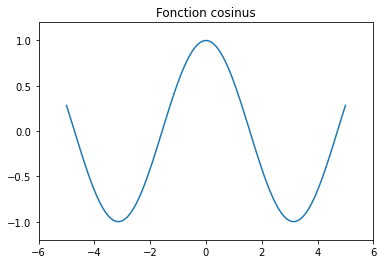

In [1]:
import csv  #On impote toutes les librairies que l'on va utiliser
import numpy as np
import matplotlib.pyplot as plt

def ecrire() :
   with open("math.csv", "w", newline='') as fichier :  #on ouvre/crée le fichier math.csv et on fait ensorte qu'il n'y ait pas de retour à laligne non nécessaire
       math = csv.writer(fichier)
       for i in range(-50,51, 1) :  #On fait une boucle afin de stocker suffisament de valeur entre -5 et 5
           x = i/10
           y = np.cos(x)
           math.writerow([x,y])     #Chaque ligne sera donc composée de la valeur du x et ensuite de celle du y
    
           
def lire() :
    x = []      #On crée deux listes vides qui vont ensuite contenir les valeurs de x et y
    y = []
    with open("math.csv", "r", newline='') as fichier :     #On ouvre le fichier et on le lit
        contenu = csv.reader(fichier)
        for i in contenu :
            print(i)    #On affiche le fichier
            x.append(float(i[0]))       #On ajoutes les valeurs de x et les valeurs de y dans leurs listes respectives
            y.append(float(i[1]))
    plt.xlim(-6 ,6)     #On délimite l'affichage
    plt.ylim(-1.2, 1.2)
    plt.plot(x, y)      #On trace la courbe
    plt.title("Fonction cosinus")       #On donne un titre au graphique
    plt.show()      #On affiche le graphique


def main() :
    ecrire()
    lire()


if __name__ == '__main__' :
    main()


On commence par importer les librairies qui nous seront utiles. On crée ensuite la fonction ecrire dans la quelle on ouvre/crée notre fichier math.csv.On ouvre donc en mode écriture, on rajoute "newline='" afin d'éviter que (sous windows) il y ait un saut de ligne entre chaque couple de valeur. On initialise ensuite l'écriture. Pour que notre fonction soit réaliste et ne ressemble pas à des droites tirées entre 4 ou 5 points on a besoin de beaucoup de valeurs. C'est pourquoi on va importer les valeurs de la fonction entre -5 et 5 avec un pas de 0,1. Pour ce faire on crée une boucle for i in range et on multiplie nos valeurs par 10. Ce qui nous donne de -50 à -51 de 1 en 1. On devra ensuite diviser x par 10 pour retomber sur les valeurs de -5 à 5. On met ensuite ces valeurs dans notre fichier. Une ligne du fichier comportera donc la valeur de x suivie de la valeur de y.
On s'occupe ensuite de la fonction lire. On commence par créer deux listes vides x et y qui contieront les valeurs de la fonction. On ouvre notre fichier en mode lecture et on le lit à l'aide d'une fonction de la librairie csv. On fait ensuite une boucle qui va nous permettre d'afficher le fichier et de mettre les valeurs de x dans la liste x et les valeurs de y dans la liste y. On délimite ensuite l'affichage, on trace la courbe, on donne un titre au graphique et on l'affiche.